In [2]:
#EDA관련 패키지 구성 및 디스플레이 설정
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from IPython.display import set_matplotlib_formats
import warnings
import datetime
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
set_matplotlib_formats('retina')
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
df_ori = pd.read_csv("./팀_basline_csv.csv")

In [6]:
df=df_ori.copy()

# 데이터파악

In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brandnm     1466 non-null   object
 1   goodsnm     1466 non-null   object
 2   USER        1466 non-null   object
 3   reg_date    1466 non-null   object
 4   order_date  1466 non-null   object
 5   p_type      1466 non-null   object
 6   sub_type    1466 non-null   object
 7   app_yn      1466 non-null   object
 8   days        1466 non-null   object
 9   day_type    1466 non-null   object
 10  month       1466 non-null   int64 
 11  How_long    1466 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 137.6+ KB


>**(1).brandnm: 아이템의 브랜드 이름 컬럼 : 범주형 <br>
(2).goodsnm : 아이템의 특성을 담은 이름 컬럼 : 범주형 <br>
(3). USER : 사용자 ID 컬럼 : 범주형 <br>
(4). reg_date : 사용자 가입일 컬럼 : 날짜형 <br>
(5). order_date : 아이템 주문일 컬럼 : 날짜형<br>
(6). p_type : 주문 상품권 종류 5일 7일 : 범주형<br>
(7). sub_type : 주문 아이템 카테고리 : 범주형 <br>
(8). add_yn : 사용자의 어플리케이션 사용 여부 : 범주형**

# Activation

## 결제 전환율을 높이려면 Sharer을 모집하고 상품군을 늘려라!

In [9]:
#월별로 데이터 분할
df_month=df.copy()
df_month.order_date = pd.to_datetime(df_month.order_date)
df_month.reg_date = pd.to_datetime(df_month.reg_date) 

In [10]:
df_month['trans_period']=(df_month['order_date']-df_month['reg_date']).dt.days

In [11]:
#월별로 데이터 분할
df_month1=df_month[df_month['order_date'].dt.month==1]
df_month2=df_month[df_month['order_date'].dt.month==2]
df_month3=df_month[df_month['order_date'].dt.month==3]

In [12]:
#월별 전환기간 평균, 중앙값 추이
print(df_month1['trans_period'].mean())
print(df_month2['trans_period'].mean())
print(df_month3['trans_period'].mean())
print(df_month1['trans_period'].median())
print(df_month2['trans_period'].median())
print(df_month3['trans_period'].median())

113.88266666666667
89.46799116997792
115.11912225705329
14.0
3.0
3.0


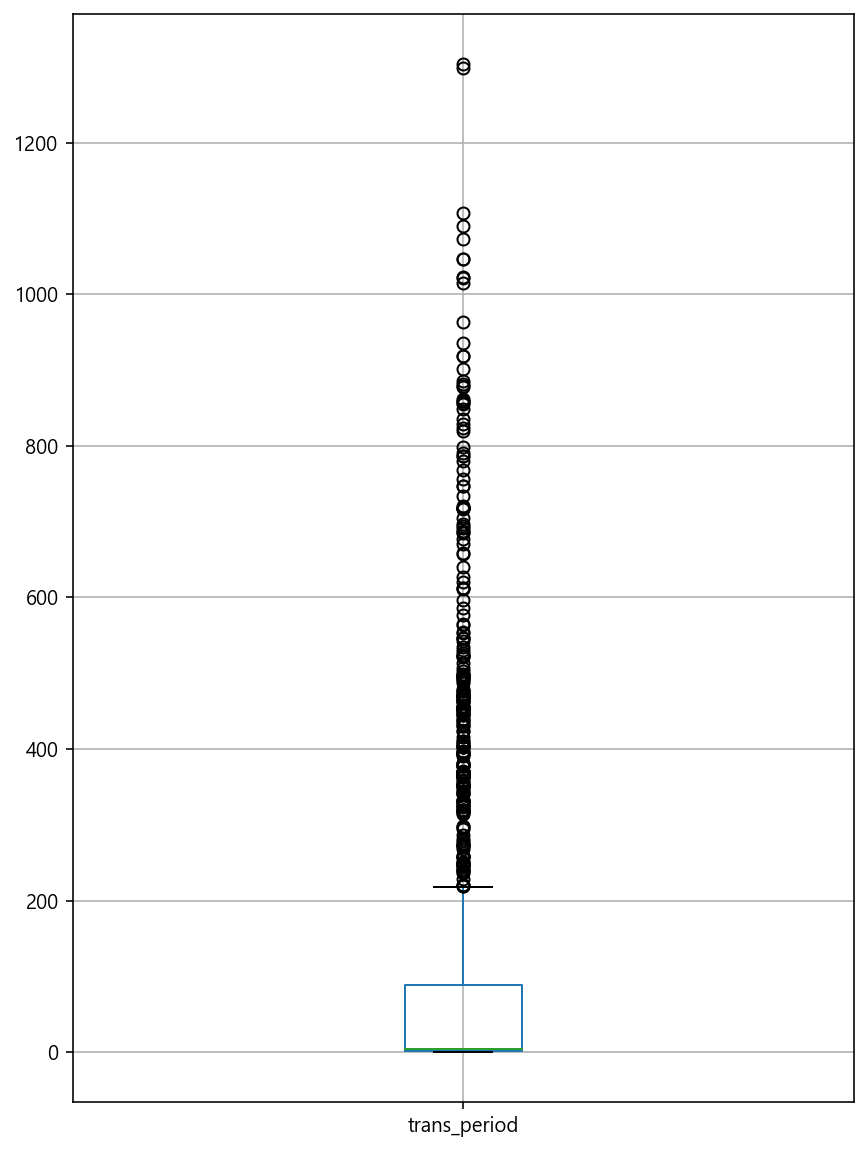

In [13]:
#전체데이터 전환기간 분포
plt.figure(figsize=(7,10))
boxplot=df_month.boxplot(column='trans_period')
plt.show()

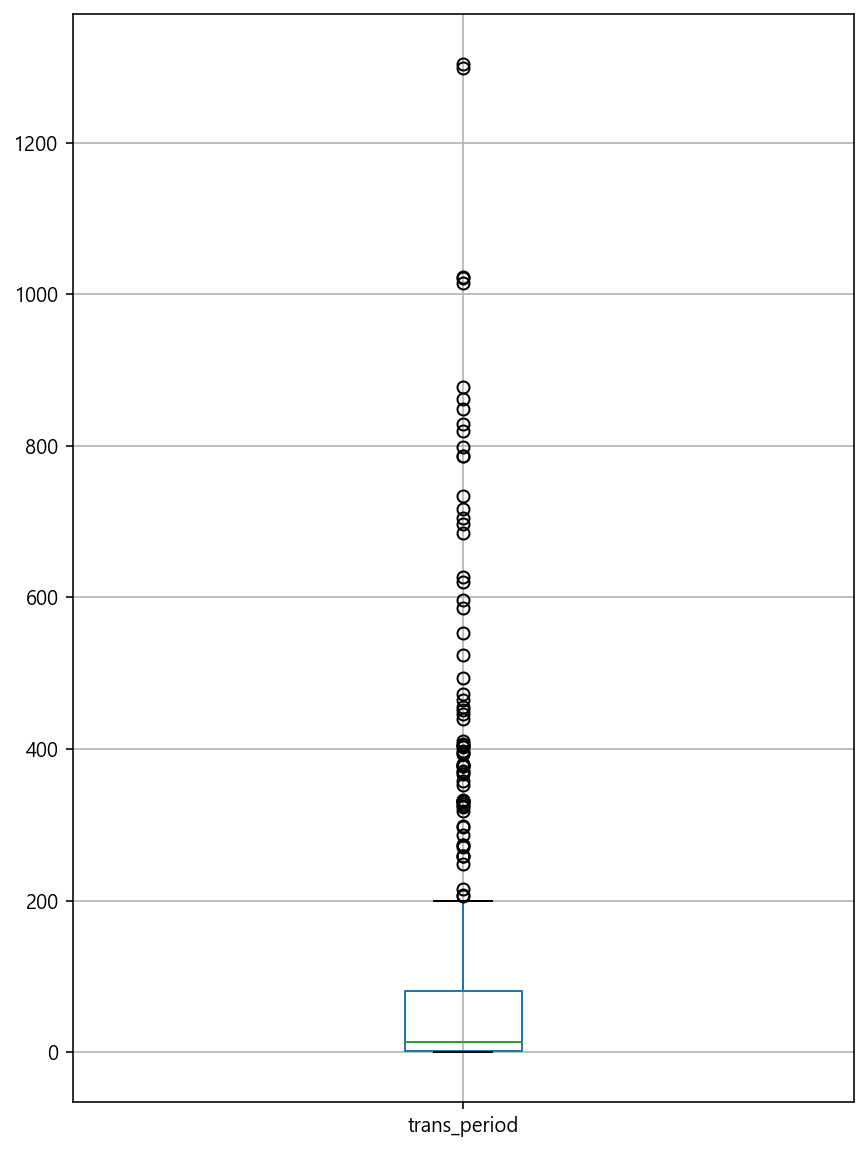

In [14]:
#월별 전환기간 분포(1월)
plt.figure(figsize=(7,10))
boxplot=df_month1.boxplot(column='trans_period')
plt.show()

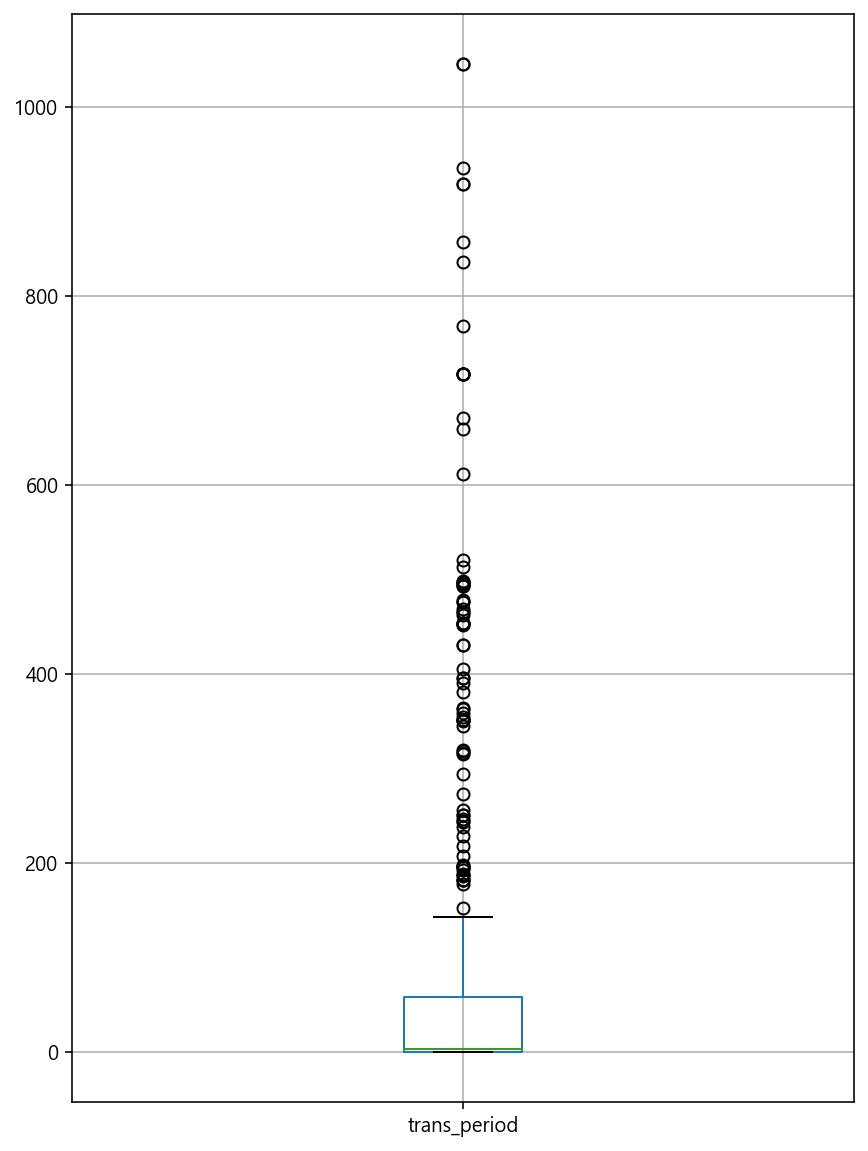

In [15]:
#월별 전환기간 분포(2월)
plt.figure(figsize=(7,10))
boxplot=df_month2.boxplot(column='trans_period')
plt.show()

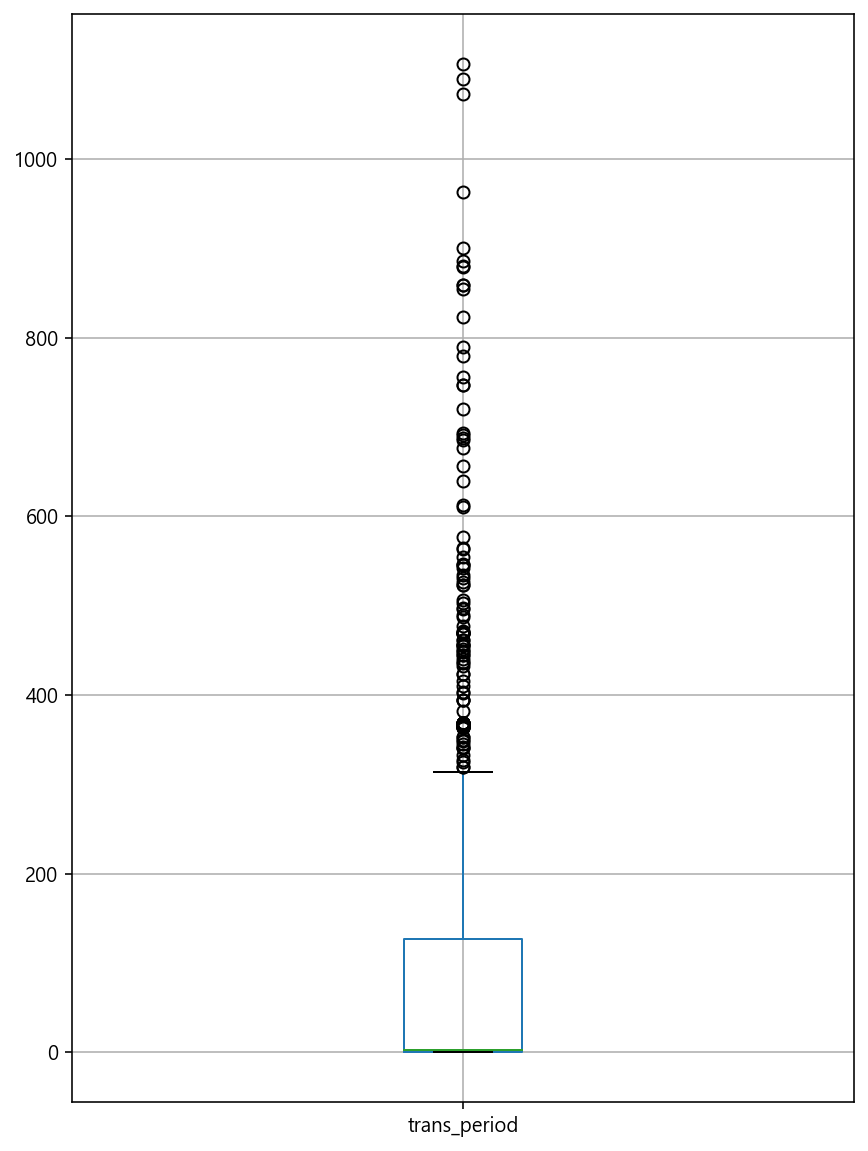

In [16]:
#월별 전환기간 분포(3월)
plt.figure(figsize=(7,10))
boxplot=df_month3.boxplot(column='trans_period')
plt.show()

>**전환기간 0~3일은 TS등급** <br>
**전환기간 4~200일 TA등급**<br>
**전환기간 200~600일 TB등급**<br>
**전환기간 600일이상 TC등급**<br>

In [17]:
df_ts=df_month[(df_month['trans_period']>=0) & (df_month['trans_period']<=3)]
df_ta=df_month[(df_month['trans_period']>=4) & (df_month['trans_period']<=200)]
df_tb=df_month[(df_month['trans_period']>=201) & (df_month['trans_period']<=600)]
df_tc=df_month[df_month['trans_period']>600]

In [18]:
print(len(df_ts['USER'].unique()))
print(len(df_ta['USER'].unique()))
print(len(df_tb['USER'].unique()))
print(len(df_tc['USER'].unique()))

627
368
178
56


In [19]:
627/(627+368+178+56)

0.5101708706265257

이미 전환률이 매우 좋기때문에 Activiation 수치는 좋다고 판단한다. 다만 전환률 KPI를 쫌 더 나은 개선 방안을 제시한다면 TA,TB,TC의 특징을 나타내는 아래의 결과를 참조하길 바란다.

## brandnm컬럼 비교 분석
**(재고량이 많고 적은지에 대해 따라 고객의 선택이 구찌로 편향될 수 있는 가능성)**

### S 유저 그룹 상품 선호도 분포

<AxesSubplot:>

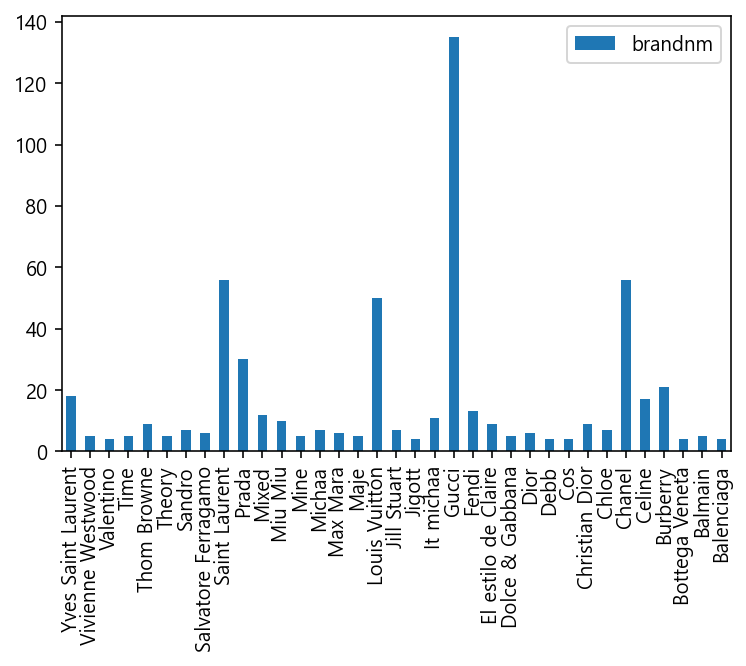

In [20]:
df_TS_value = pd.DataFrame(df_ts["brandnm"].value_counts()).sort_index(ascending=False)
df_TS_value = df_TS_value[df_TS_value["brandnm"] > 3]
df_TS_value.plot(kind="bar")

### A 유저 그룹 상품 선호도 분포

<AxesSubplot:>

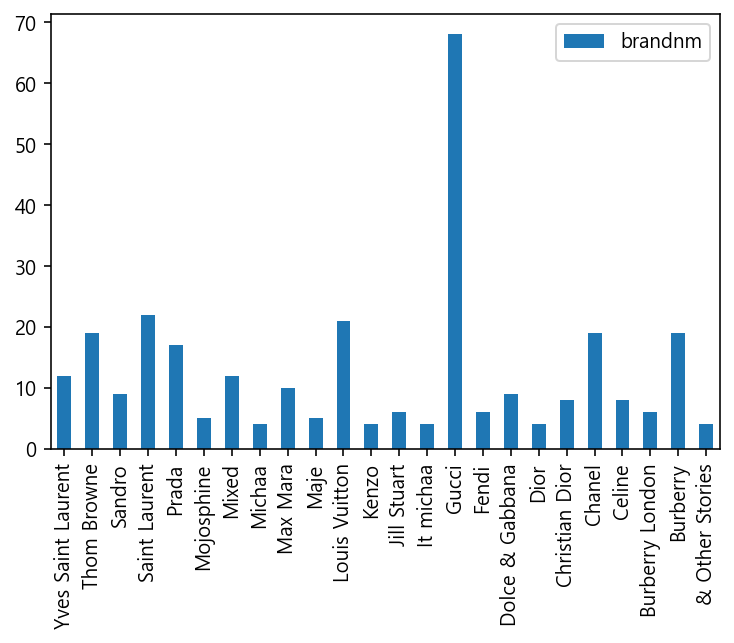

In [21]:
df_TA_value = pd.DataFrame(df_ta["brandnm"].value_counts()).sort_index(ascending=False)
df_TA_value = df_TA_value[df_TA_value['brandnm']>3]
df_TA_value.plot(kind="bar")

### B 유저 그룹 상품 선호도 분포

<AxesSubplot:>

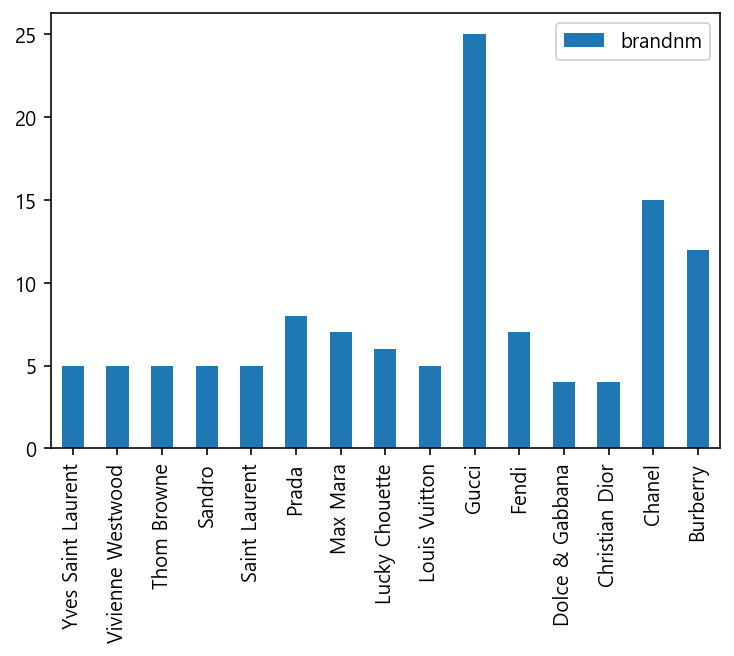

In [22]:
df_TB_value = pd.DataFrame(df_tb["brandnm"].value_counts()).sort_index(ascending=False)
df_TB_value = df_TB_value[df_TB_value['brandnm']>3]
df_TB_value.plot(kind="bar")

## 구찌 상품 선호도 (모집단과 다른 성향의 결과를 찾는데 집중)

### 모집단 구찌 상품 선호도

In [23]:
df_population = df.query('brandnm == "Gucci"')

<AxesSubplot:>

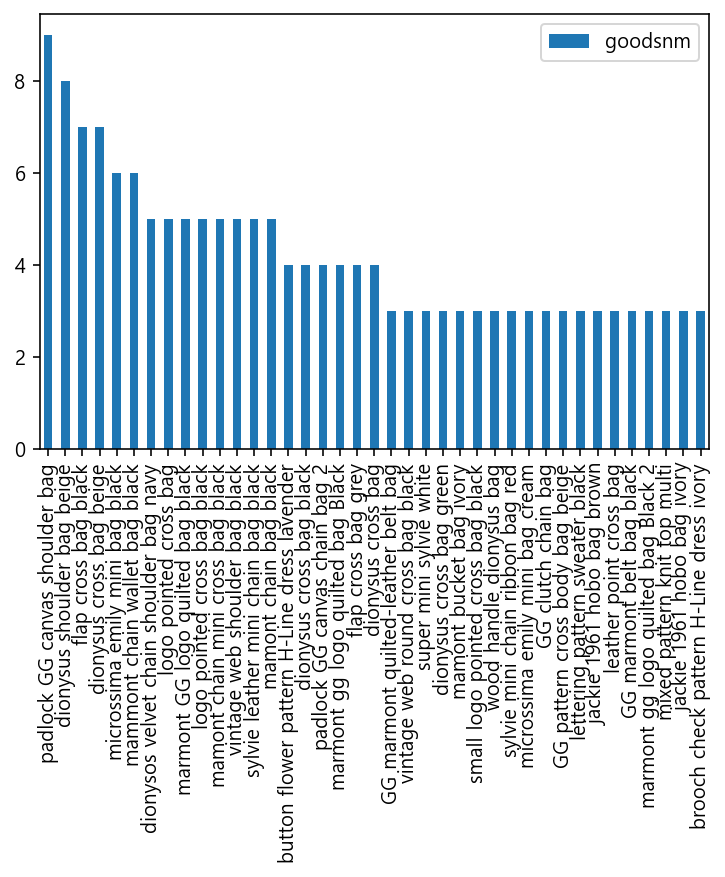

In [24]:
df_population_Gucci = pd.DataFrame(df_population["goodsnm"].value_counts())
df_population_Gucci[df_population_Gucci["goodsnm"] >2].plot(kind="bar")

In [25]:
df_population_Gucci.index

Index(['padlock GG canvas shoulder bag', 'dionysus shoulder bag beige',
       'flap cross bag black', 'dionysus cross bag beige',
       'microssima emily mini bag black', 'mammont chain wallet bag black',
       'dionysos velvet chain shoulder bag navy', 'logo pointed cross bag',
       'marmont GG logo quilted bag black', 'logo pointed cross bag black',
       'mamont chain mini cross bag black', 'vintage web shoulder bag black',
       'sylvie leather mini chain bag black', 'mamont chain bag black',
       'button flower pattern H-Line dress lavender',
       'dionysus cross bag black', 'padlock GG canvas chain bag 2',
       'marmont gg logo quilted bag Black', 'flap cross bag grey',
       'dionysus cross bag', 'GG marmont quilted-leather belt bag',
       'vintage web round cross bag black', 'super mini sylvie white',
       'dionysus cross bag green', 'mamont bucket bag ivory',
       'small logo pointed cross bag black', 'wood handle dionysus bag',
       'sylvie mini chain ri

### S 유저 그룹 구찌 상품 선호도

<AxesSubplot:>

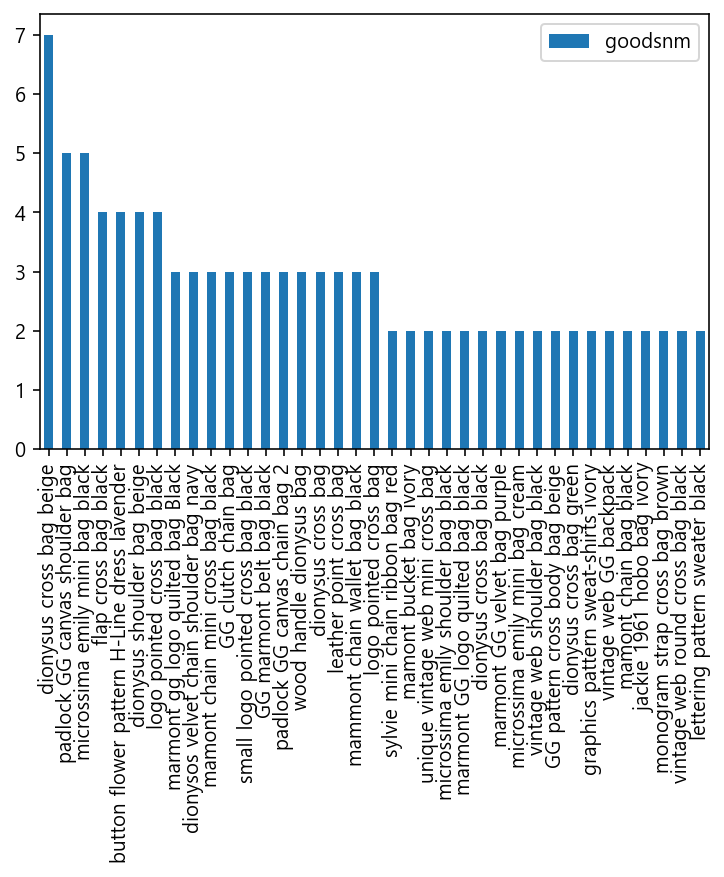

In [26]:
df_ts_Gucci = df_ts.query('brandnm == "Gucci"')
df_ts_Gucci_df = pd.DataFrame(df_ts_Gucci["goodsnm"].value_counts())
df_ts_Gucci_df[df_ts_Gucci_df["goodsnm"] >1].plot(kind="bar")

In [27]:
df_ts_Gucci_df.index

Index(['dionysus cross bag beige', 'padlock GG canvas shoulder bag',
       'microssima emily mini bag black', 'flap cross bag black',
       'button flower pattern H-Line dress lavender',
       'dionysus shoulder bag beige', 'logo pointed cross bag black',
       'marmont gg logo quilted bag Black',
       'dionysos velvet chain shoulder bag navy',
       'mamont chain mini cross bag black', 'GG clutch chain bag',
       'small logo pointed cross bag black', 'GG marmont belt bag black',
       'padlock GG canvas chain bag 2', 'wood handle dionysus bag',
       'dionysus cross bag', 'leather point cross bag',
       'mammont chain wallet bag black', 'logo pointed cross bag',
       'sylvie mini chain ribbon bag red', 'mamont bucket bag ivory',
       'unique vintage web mini cross bag',
       'microssima emily shoulder bag black',
       'marmont GG logo quilted bag black', 'dionysus cross bag black',
       'marmont GG velvet bag purple', 'microssima emily mini bag cream',
       'v

mammont chain wallet bag black <br>
TA그룹 1위 상품 모집단 4위 상품 

dionysus cross bag beige<br>
TS그룹에서는 1위 상품 모집단에서는 3위 상품 

padlock GG canvas shoulder bag <br>
TS그룹에서는 2위 상품 모집단에서는 1위 상품 

microssima emily mini bag black <br>
TS그룹에서는 2위 상품  모집단에서는 4위 상품

button flower pattern H-Line dress lavender <br>
TS그룹에서는 3위 상품
모집단에서는 5위 상품 

flap cross bag black <br>
TS그룹에서는 3위 상품 모집단에서도 3위 상품 

dionysus shoulder bag beige<br>
TS그룹에서는 3위상품 모집단에서는 2위 상품

### A 그룹 유저 꾸지 상품 선호도

<AxesSubplot:>

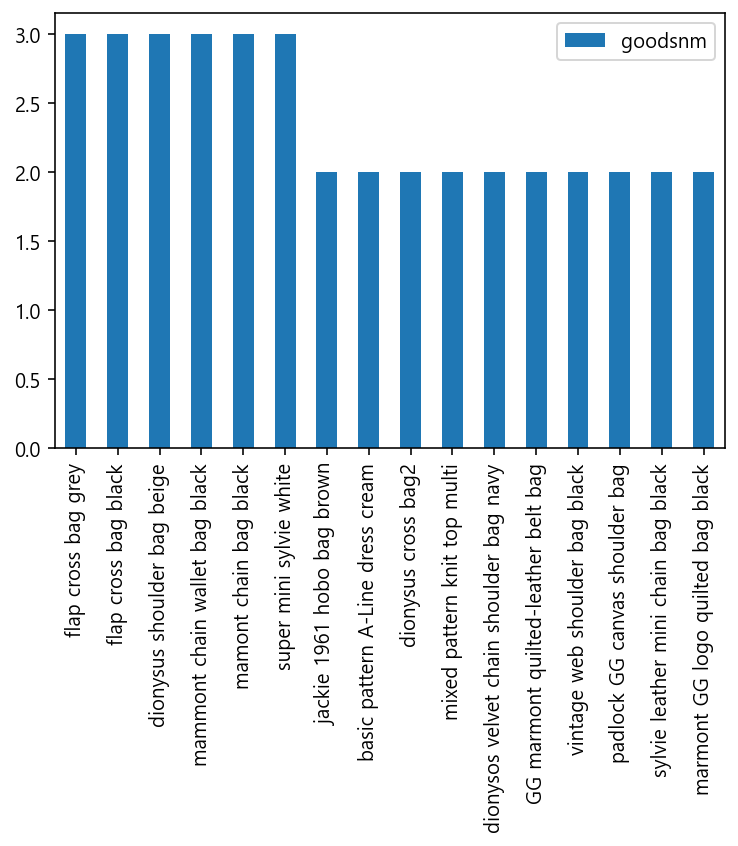

In [28]:
df_ta_Gucci = df_ta.query('brandnm == "Gucci"')
df_ta_Gucci_df = pd.DataFrame(df_ta_Gucci["goodsnm"].value_counts())
df_ta_Gucci_df[df_ta_Gucci_df["goodsnm"] >1].plot(kind="bar")

In [29]:
df_ta_Gucci_df.index

Index(['flap cross bag grey', 'flap cross bag black',
       'dionysus shoulder bag beige', 'mammont chain wallet bag black',
       'mamont chain bag black', 'super mini sylvie white',
       'jackie 1961 hobo bag brown', 'basic pattern A-Line dress cream',
       'dionysus cross bag2', 'mixed pattern knit top multi',
       'dionysos velvet chain shoulder bag navy',
       'GG marmont quilted-leather belt bag', 'vintage web shoulder bag black',
       'padlock GG canvas shoulder bag', 'sylvie leather mini chain bag black',
       'marmont GG logo quilted bag black', 'v neck floral printing dress',
       'sylvie mini chain ribbon bag red', 'GG marmont cross bag bluegreen',
       'mamont chain mini cross bag black', 'microssima emily mini bag cream',
       'vintage web GG two way bag brown', 'mixed pattern ribbon jacket multi',
       'ophidia small black', 'sylvie mini chain ribbon bag white',
       'vintage web round cross bag black',
       'printing pattern sweat-shirts grey',


mammont chain wallet bag black <br>
TA그룹 1위 상품 모집단 4위 상품 

mamont chain bag black <br>
TA그룹 1위 상품 모집단 4위 상품

mamont chain bag black<br>
TA그룹 1위 상품 모집단 6위 상품 

super mini sylvie white <br>
TA그룹 1위 상품 모집단 7위 상품

flap cross bag grey<br>
TA그룹 1위 상품 모집단 6위 상품

dionysus shoulder bag beige <br>
TA그룹에서 1위 TS그룹에서는 3위상품 모집단에서는 2위 상품

### B 그룹 유저 꾸지 상품 선호도

<AxesSubplot:>

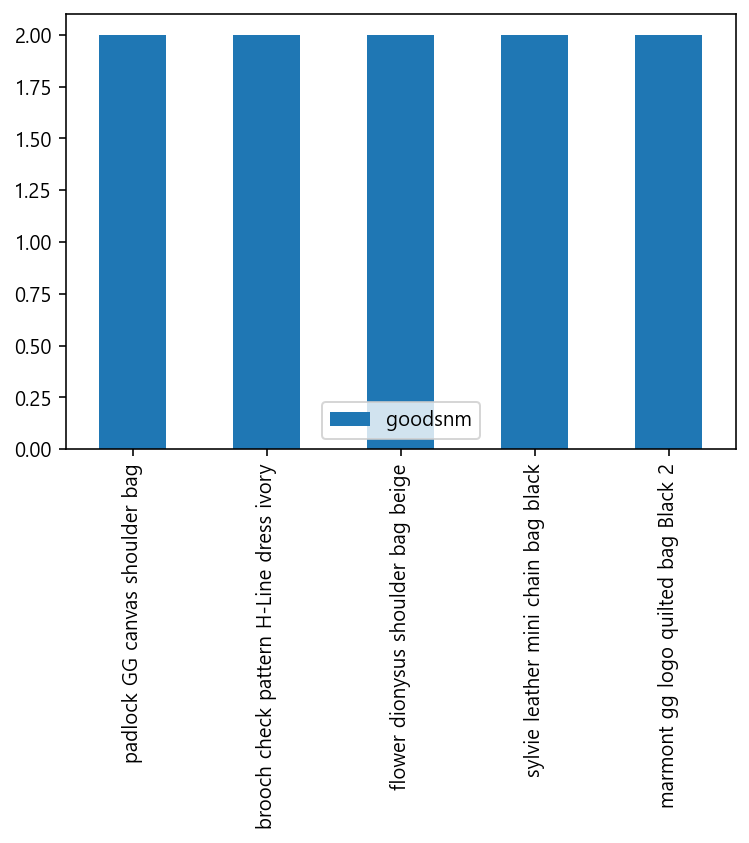

In [30]:
df_tb_Gucci = df_tb.query('brandnm == "Gucci"')
df_tb_Gucci_df = pd.DataFrame(df_tb_Gucci["goodsnm"].value_counts())
df_tb_Gucci_df[df_tb_Gucci_df["goodsnm"] >1].plot(kind="bar")

In [31]:
df_tb_Gucci_df.index

Index(['padlock GG canvas shoulder bag',
       'brooch check pattern H-Line dress ivory',
       'flower dionysus shoulder bag beige',
       'sylvie leather mini chain bag black',
       'marmont gg logo quilted bag Black 2',
       'lettering point two way bag brown',
       'sylvie leather mini chain bag red', 'logo pointed cross bag black',
       'mamont chain mini cross bag black', 'GG supreme clutch brown',
       'dionysus shoulder bag beige', 'marmont GG logo quilted bag black',
       'Mickeymouse Round Shoulder Bag', 'dionysus cross bag black',
       'logo pointed cross bag', 'dionysus cross bag',
       'jackie 1961 hobo bag ivory', 'monogram mammont chain bag black',
       'mixed pattern knit top multi', 'dionysus cross bag green'],
      dtype='object')

flower dionysus shoulder bag beige <br>
TB 1위 상품 모집단 10위 밖 상품 

padlock GG canvas shoulder bag <br>
TB 1위 상품 모집단 1위 상품 

marmont gg logo quilted bag Black 2 <br>
TB 1위 상품 모집단 7위 상품 

sylvie leather mini chain bag black<br>
TB 1위 상품 모집단 5위 상품 

brooch check pattern H-Line dress ivory <br>
TB1위 상품 모집단 7위 상품 

In [32]:
df_ts

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long,trans_period
8,Gucci,dionysus cross bag,a1143028,2021-01-14,2021-01-15,4days,BA,Y,금요일,주중,1,1,1
15,Prada,logo hobo bag black,a1143143,2021-01-15,2021-01-15,4days,BA,Y,금요일,주중,1,0,0
16,Gucci,microssima mini cross body bag pink,a1142921,2021-01-14,2021-01-14,4days,BA,Y,목요일,주중,1,0,0
17,Time,pocket basic pattern coat black,a1142921,2021-01-14,2021-01-14,4days,O,Y,목요일,주중,1,0,0
18,The Izzat,check pattern double breasted coat gray,a1142834,2021-01-13,2021-01-14,4days,O,Y,목요일,주중,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,Burberry,check mackenzie cross bag pink,a1147938,2021-03-01,2021-03-01,7days,BA,Y,공휴일,휴일,3,0,0
1459,Burberry London,embroidery basic pattern wool sweater brown,a1147932,2021-03-01,2021-03-01,4days,T,Y,공휴일,휴일,3,0,0
1460,London Fog,button basic pattern coat grey,a1147932,2021-03-01,2021-03-01,4days,O,Y,공휴일,휴일,3,0,0
1463,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1,1


**TS 등급 기초 탐색**

In [41]:
#ts등급의 brandnm 분포 탐색
df_tsb=df_ts['brandnm'].value_counts()
print(df_tsb)

Gucci             135
Chanel             56
Saint Laurent      56
Louis Vuitton      50
Prada              30
                 ... 
L’ vir              1
roajeu              1
Calvin Klein        1
Zooc                1
Your Name Here      1
Name: brandnm, Length: 150, dtype: int64


In [42]:
#ts등급 goodsnm 분포 탐색
df_tsg=df_ts['goodsnm'].value_counts()
print(df_tsg.head(15))

chevron quilted cross bag black                16
boy chanel clutch black                        11
dionysus cross bag beige                        7
classic clutch black                            7
epi tote bag black                              6
mini sunset chain bag black                     6
quilted shoulder bag black                      6
padlock GG canvas shoulder bag                  5
microssima emily mini bag black                 5
button flower pattern H-Line dress lavender     4
chevron quilting cross bag cream                4
monogram clutch brown                           4
monogram cross body bag black                   4
dionysus shoulder bag beige                     4
flap cross bag black                            4
Name: goodsnm, dtype: int64


In [43]:
#ts등급 USER 컬럼 분포 확인
df_tsu=df_ts['USER'].value_counts()
print('가장 많은 데이터를 가진 고객의 데이터 수는 %d 입니다.' %(df_tsu.max()))
print(df_tsu)

가장 많은 데이터를 가진 고객의 데이터 수는 11 입니다.
a1149461    11
a1149583    10
a1149542     6
a1149258     4
a1142679     4
            ..
a1147915     1
a1147942     1
a1144833     1
a1150428     1
a1148459     1
Name: USER, Length: 620, dtype: int64


In [44]:
#ts등급 p_type 분포 탐색
df_tsp=df_ts['p_type'].value_counts()
print(df_tsp)
326/(383+326)

4days    383
7days    326
Name: p_type, dtype: int64


0.459802538787024

AxesSubplot(0.125,0.125;0.775x0.755)


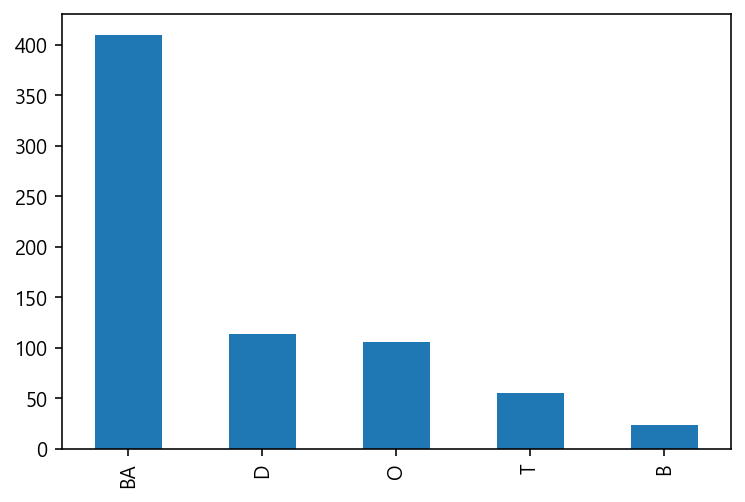

In [45]:
#ts등급 sub_type 분포 탐색
df_tss=df_ts['sub_type'].value_counts().plot(kind='bar')
print(df_tss)

In [46]:
#ts등급 app_yn 분포 탐색
df_tsa=df_ts['app_yn'].value_counts()
print(df_tsa)

Y    601
N    108
Name: app_yn, dtype: int64


In [47]:
(1).brandnm: 아이템의 브랜드 이름 컬럼 : 범주형
(2).goodsnm : 아이템의 특성을 담은 이름 컬럼 : 범주형
(3). USER : 사용자 ID 컬럼 : 범주형
(4). reg_date : 사용자 가입일 컬럼 : 날짜형
(5). order_date : 아이템 주문일 컬럼 : 날짜형
(6). p_type : 주문 상품권 종류 5일 7일 : 범주형
(7). sub_type : 주문 아이템 카테고리 : 범주형
(8). add_yn : 사용자의 어플리케이션 사용 여부 : 범주형

SyntaxError: invalid syntax (<ipython-input-47-9fec76f3cb91>, line 1)

**TA등급 기초 탐색**

In [ ]:
#ta등급의 brandnm 분포 탐색
df_tab=df_ta['brandnm'].value_counts().head(20)
print(df_tab)

In [ ]:
#ta등급 goodsnm 분포 탐색
df_tag=df_ta['goodsnm'].value_counts()
print(df_tag.head(20))

In [ ]:
#ta등급 USER 컬럼 분포 확인
df_tau=df_ta['USER'].value_counts()
print('가장 많은 데이터를 가진 고객의 데이터 수는 %d 입니다.' %(df_tau.max()))
print(df_tau)

In [ ]:
#ta등급 p_type 분포 탐색
df_tap=df_ta['p_type'].value_counts()
print(df_tap)
140/(310+140)

In [ ]:
#Ta그룹 sub_type 컬럼 분포 확인
df_tas=df_ta['sub_type'].value_counts().plot(kind='bar')
print(df_subtype)

In [ ]:
#ta등급 app_yn 사용여부 분포 탐색
df_taa=df_ta['app_yn'].value_counts()
print(df_taa)

**TB등급 기초 탐색**

In [ ]:
#ta등급의 선호 브랜드 분포 탐색
df_tbb=df_tb['brandnm'].value_counts()
print(df_tbb)

In [ ]:
#ta등급 제품 분포 탐색
df_tbg=df_tb['goodsnm'].value_counts()
print(df_tbg.head(15))

In [ ]:
#ta등급 결제타입 분포 탐색
df_tbp=df_tb['p_type'].value_counts()
print(df_tbp)
76/(141+76)

In [ ]:
#Ta그룹 아이템카테고리 컬럼 분포 확인
df_tbs=df_tb['sub_type'].value_counts().plot(kind='bar')
print(df_subtype)

In [ ]:
#ta등급 어플 사용여부 분포 탐색
df_tba=df_tb['app_yn'].value_counts()
print(df_tba)

**TC등급 기초 탐색**

In [ ]:
#tc등급 브랜드 선호 분포 탐색
df_tcb=df_tc['brandnm'].value_counts().head(10)
df_tcb.plot(kind='bar')

In [ ]:
#brandnm 컬럼 분포 확인
df_brandnm=df['brandnm'].value_counts().head(10)
df_brandnm.plot(kind='bar')

>**Gucci의 압도적인 선호도가 TC그룹에서는 나타나지 않음**<br>
**심지어 Chanel의 경우 상위 선호브랜드에 나타나지 않음**<br>
**TC그룹의 경우 선호브랜드분포가 다른 그룹과 다를 수 있음** 

In [ ]:
#TC그룹 sub_type 컬럼 분포 확인
df_tcs=df_tc['sub_type'].value_counts().plot(kind='bar')
print(df_subtype)

In [ ]:
#전체 데이터 sub_type 컬럼 분포 확인
df_subtype=df['sub_type'].value_counts().plot(kind='bar')
print(df_subtype)

>**제품 카테고리 분포는 전체 데이터와 비슷한 것으로 보아 브랜드 범위 측면에서 강화가 필요함**

In [ ]:
#tc등급 분포 탐색
df_tca=df_tc['app_yn'].value_counts()
print(df_tca)

In [ ]:
#tc등급 결제타입 분포 탐색
df_tcp=df_tc['p_type'].value_counts()
print(df_tcp)

In [ ]:
print(563/(874+563))
print(21/(21+40))
print(326/(383+326))

>**TC->TS로 갈수록 결제타입이 7days로 변화중**

**각 등급별 brandnm 중요도 변화**

In [93]:
df_allb2=pd.DataFrame(df['brandnm'].value_counts())
df_allb2.reset_index(inplace=True)
df_allb2['importance']=df_allb2['brandnm']/df_allb2['brandnm'].sum()
df_allb2

,index,brandnm,importance
0,Gucci,230,0.16
1,Chanel,90,0.06
2,Saint Laurent,86,0.06
3,Louis Vuitton,79,0.05
4,Prada,58,0.04
...,...,...,...
239,Ruhm,1,0.00
240,Tommy Hilfiger,1,0.00
241,Vanessa Bruno,1,0.00
242,MYEYEKO,1,0.00


<AxesSubplot:xlabel='index', ylabel='importance'>

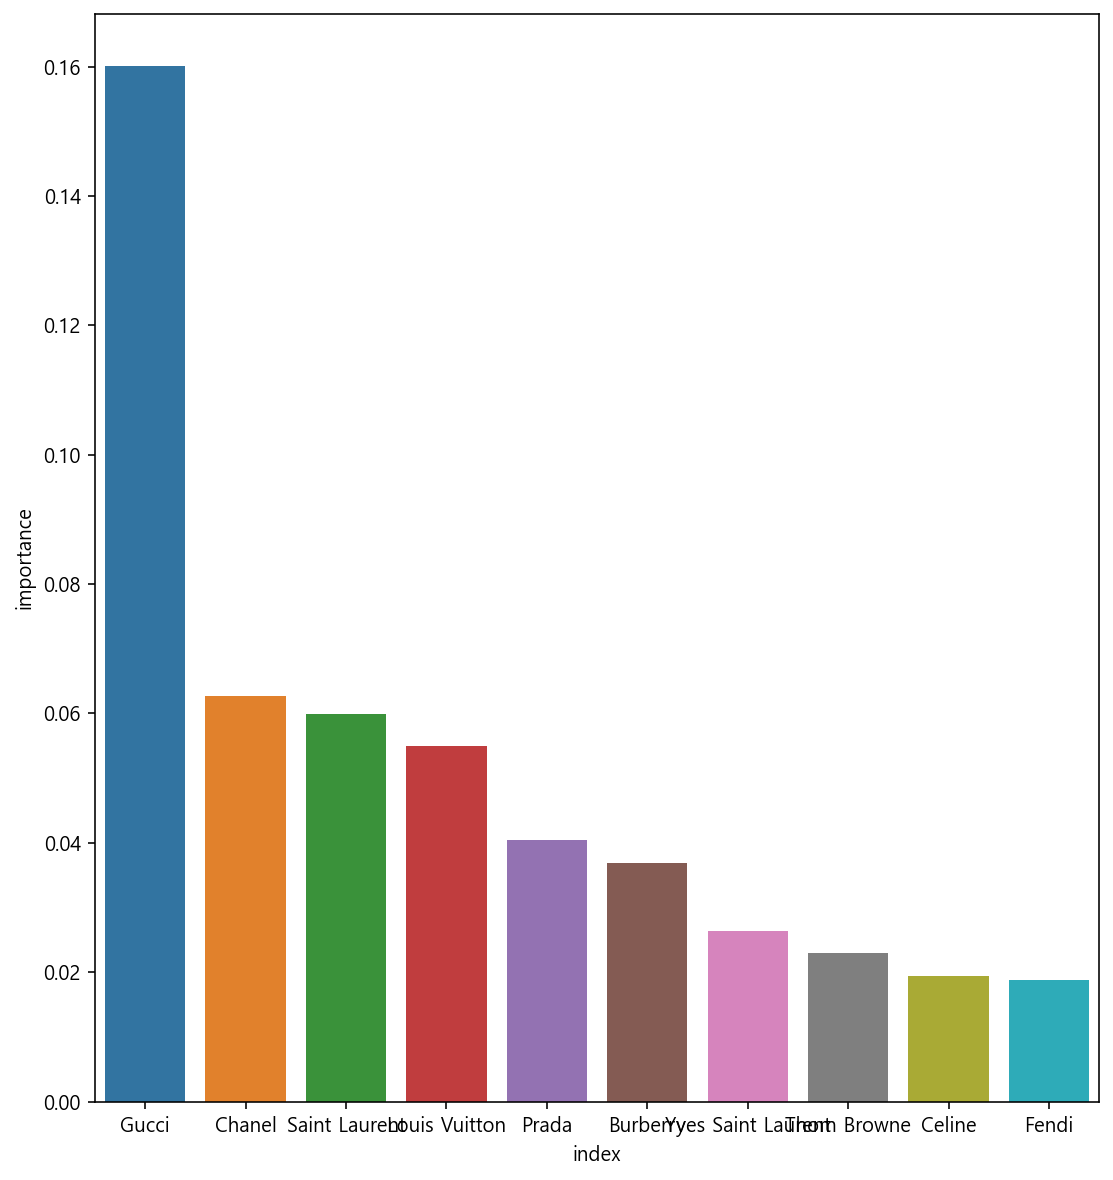

In [84]:
#전체의 brandnm 분포 탐색 심화
df_allb=pd.DataFrame(df['brandnm'].value_counts())
df_allb.reset_index(inplace=True)
df_allb['importance']=df_allb['brandnm']/df_allb['brandnm'].sum()
df_allb=df_allb.sort_values(by='importance',ascending=False).drop('brandnm',axis=1)
df_allb=df_allb.head(10)
fig, ax = pyplot.subplots(figsize=(9,10))
sns.barplot(data=df_allb,x='index',y= "importance")

<AxesSubplot:xlabel='index', ylabel='importance'>

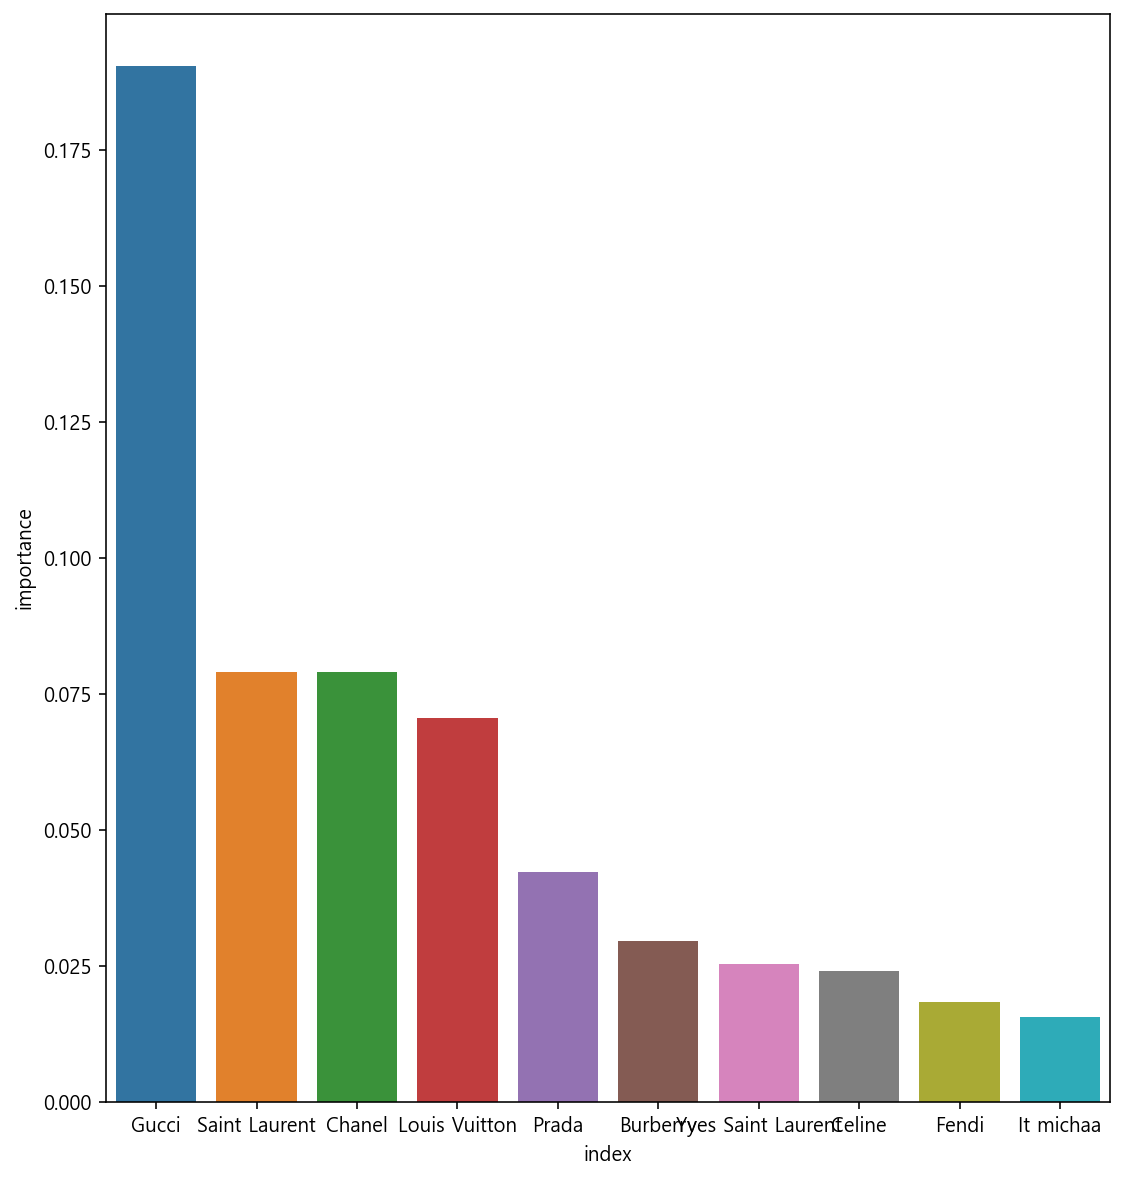

In [69]:
#ts brandnm 분포 탐색 심화
df_ts1=pd.DataFrame(df_ts['brandnm'].value_counts())
df_ts1.reset_index(inplace=True)
df_ts1['importance']=df_ts1['brandnm']/df_ts1['brandnm'].sum()
df_ts1=df_ts1.sort_values(by='importance',ascending=False).drop('brandnm',axis=1)
df_ts1=df_ts1.head(10)
fig, ax = pyplot.subplots(figsize=(9,10))
sns.barplot(data=df_ts1,x='index',y= "importance")

<AxesSubplot:xlabel='index', ylabel='importance'>

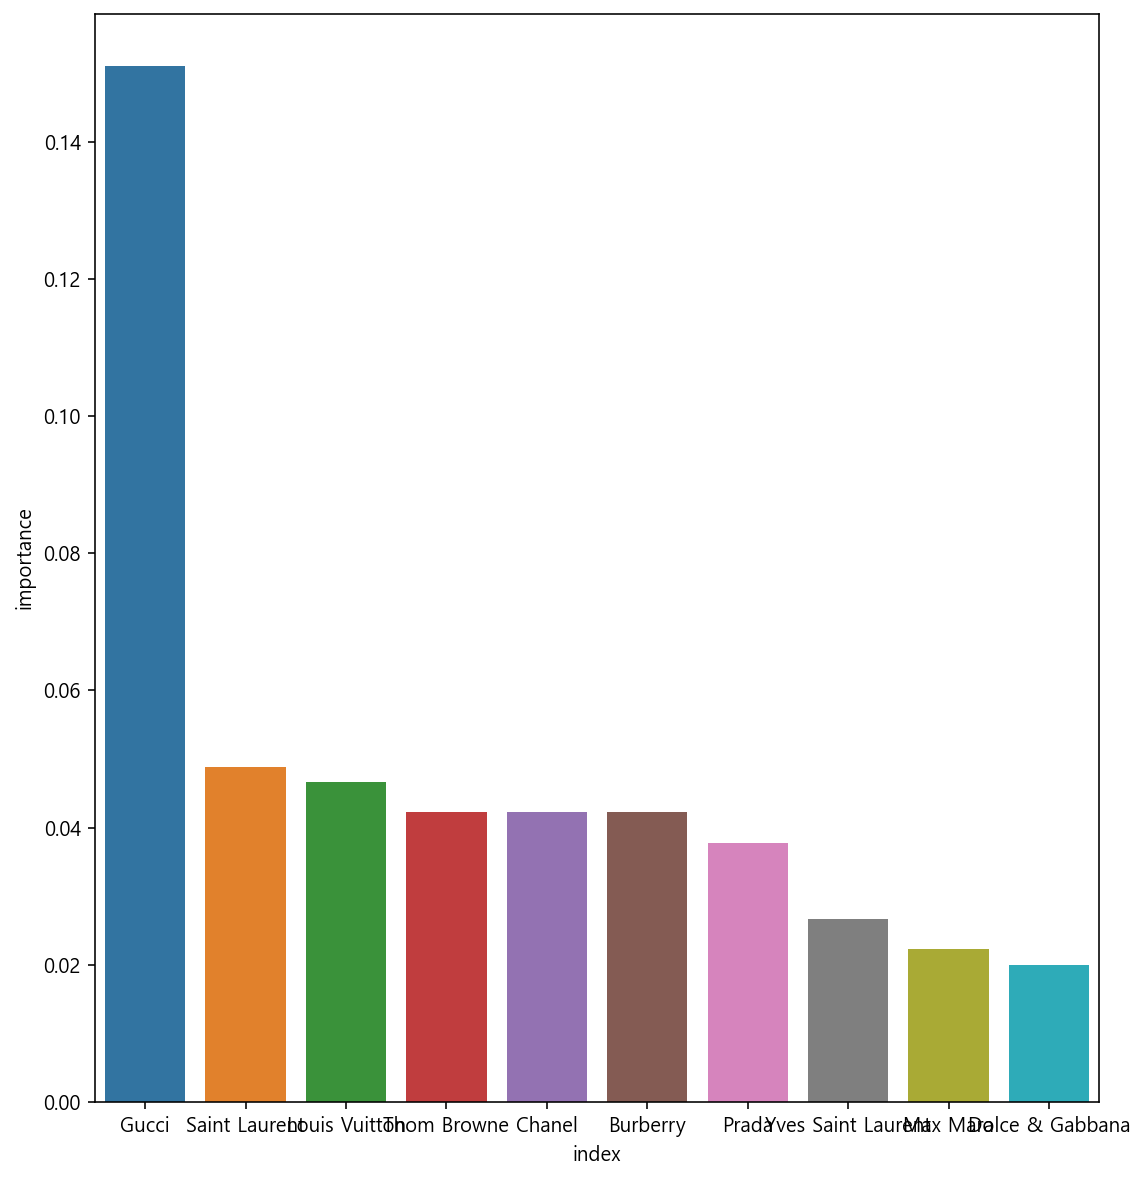

In [68]:
#ta brandnm 분포 탐색 심화
df_ta1=pd.DataFrame(df_ta['brandnm'].value_counts())
df_ta1.reset_index(inplace=True)
df_ta1['importance']=df_ta1['brandnm']/df_ta1['brandnm'].sum()
df_ta1=df_ta1.sort_values(by='importance',ascending=False).drop('brandnm',axis=1)
df_ta1=df_ta1.head(10)
fig, ax = pyplot.subplots(figsize=(9,10))
sns.barplot(data=df_ta1,x='index',y= "importance")

<AxesSubplot:xlabel='index', ylabel='importance'>

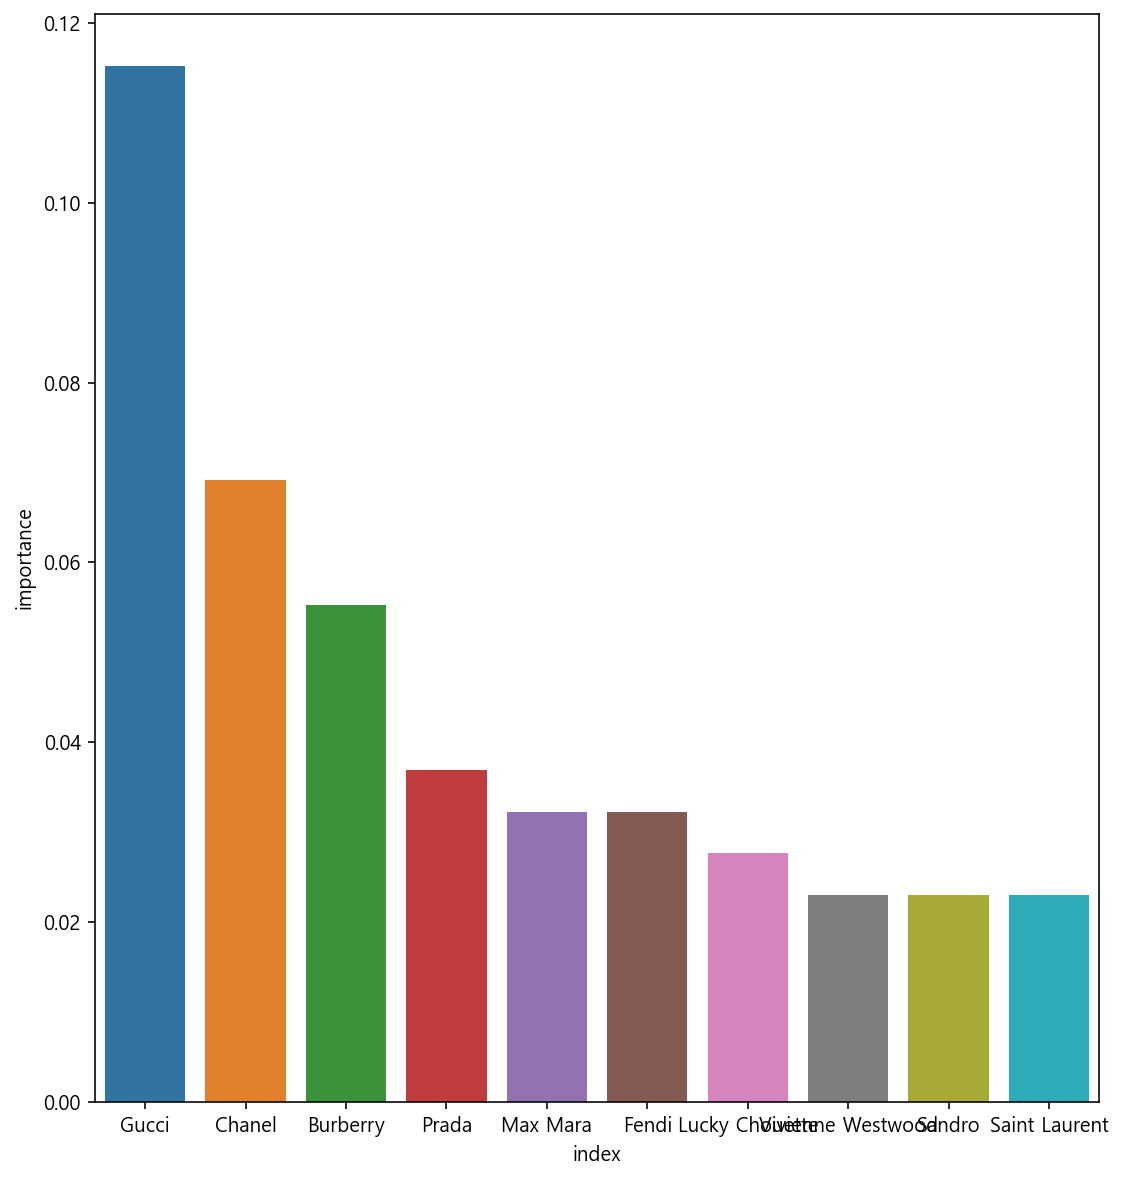

In [67]:
#tb brandnm 분포 탐색 심화
df_tb1=pd.DataFrame(df_tb['brandnm'].value_counts())
df_tb1.reset_index(inplace=True)
df_tb1['importance']=df_tb1['brandnm']/df_tb1['brandnm'].sum()
df_tb1=df_tb1.sort_values(by='importance',ascending=False).drop('brandnm',axis=1)
df_tb1=df_tb1.head(10)
fig, ax = pyplot.subplots(figsize=(9,10))
sns.barplot(data=df_tb1,x='index',y= "importance")

<AxesSubplot:xlabel='index', ylabel='importance'>

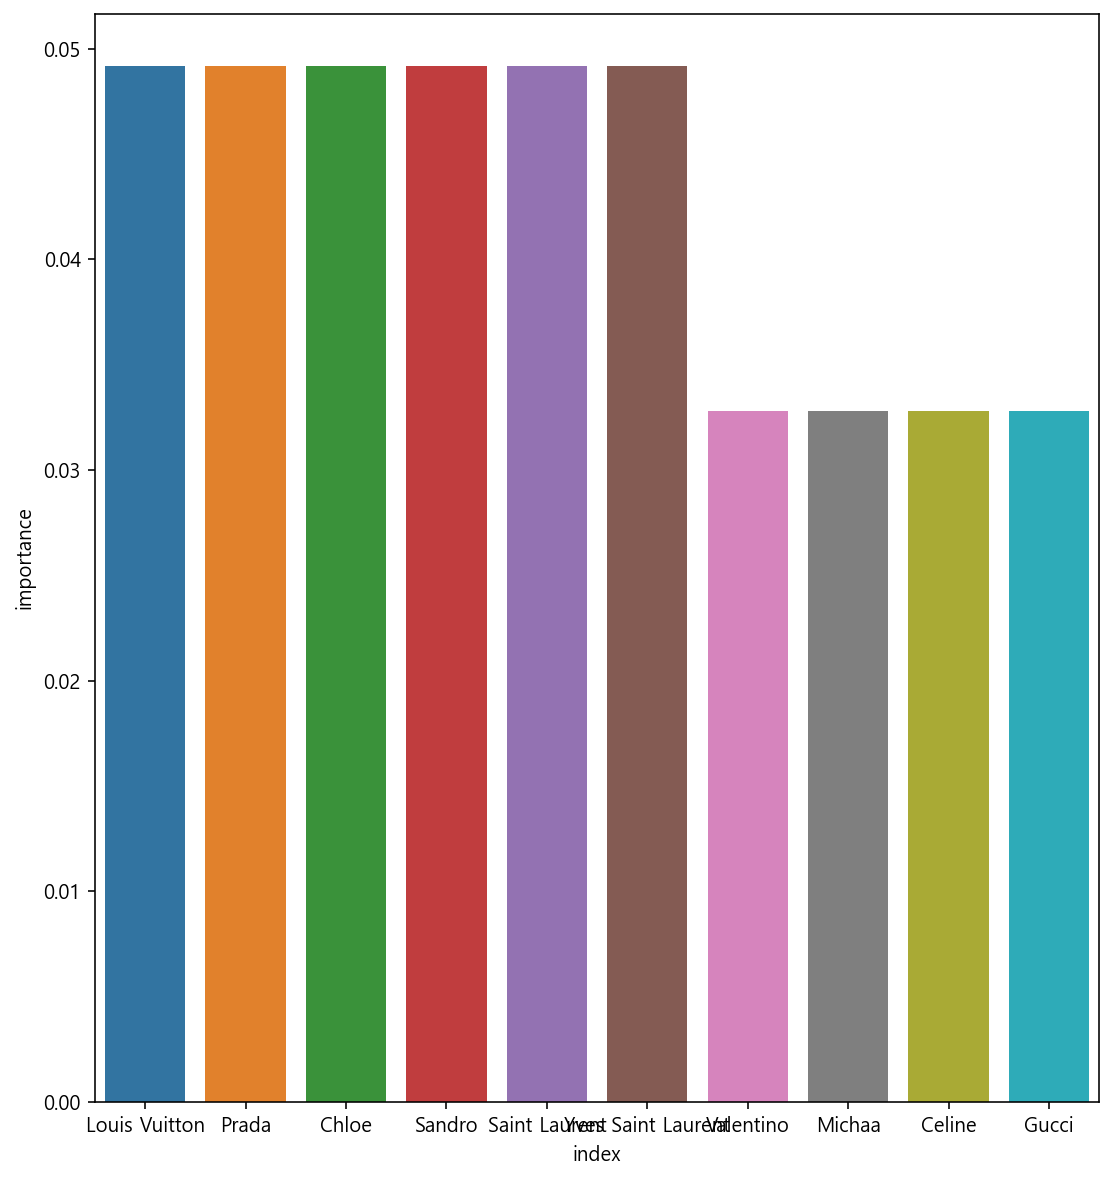

In [70]:
#tc brandnm 분포 탐색 심화
df_tc1=pd.DataFrame(df_tc['brandnm'].value_counts())
df_tc1.reset_index(inplace=True)
df_tc1['importance']=df_tc1['brandnm']/df_tc1['brandnm'].sum()
df_tc1=df_tc1.sort_values(by='importance',ascending=False).drop('brandnm',axis=1)
df_tc1=df_tc1.head(10)
fig, ax = pyplot.subplots(figsize=(9,10))
sns.barplot(data=df_tc1,x='index',y= "importance")

**각 등급별 goodsnm 중요도 변화**

<AxesSubplot:xlabel='index', ylabel='importance'>

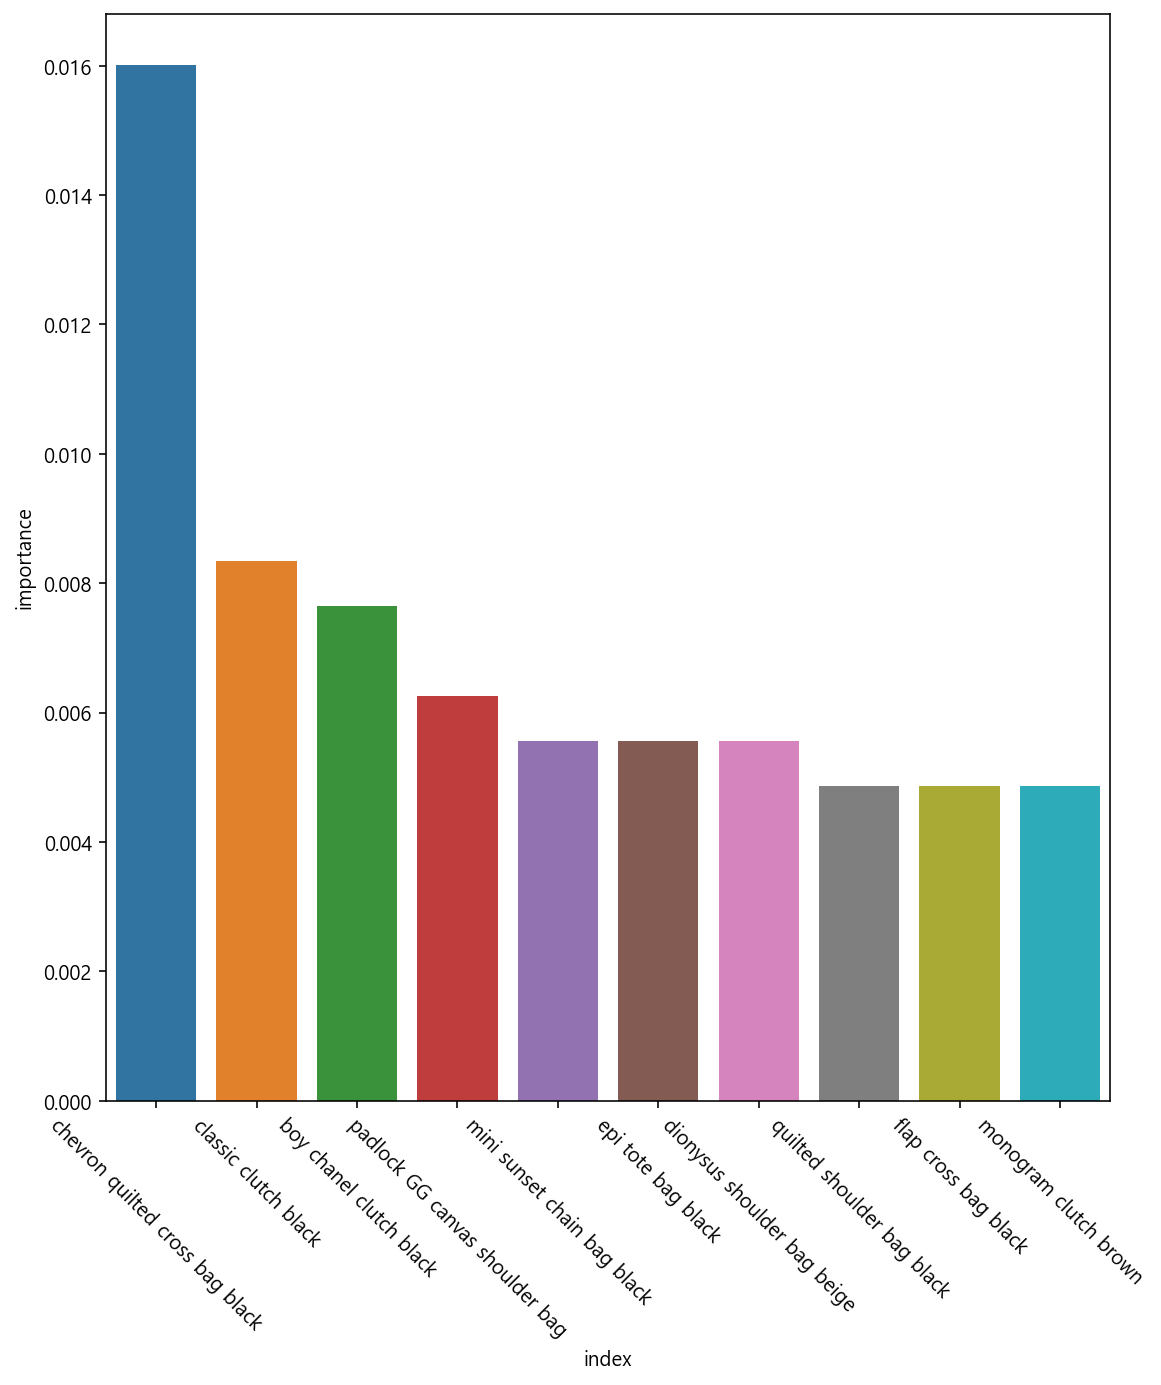

In [86]:
#전체의 goodsnm 분포 탐색 심화
df_allb=pd.DataFrame(df['goodsnm'].value_counts())
df_allb.reset_index(inplace=True)
df_allb['importance']=df_allb['goodsnm']/df_allb['goodsnm'].sum()
df_allb=df_allb.sort_values(by='importance',ascending=False).drop('goodsnm',axis=1)
df_allb=df_allb.head(10)
fig, ax = pyplot.subplots(figsize=(9,10))
plt.xticks(rotation = - 45 )
sns.barplot(data=df_allb,x='index',y= "importance")

<AxesSubplot:xlabel='index', ylabel='importance'>

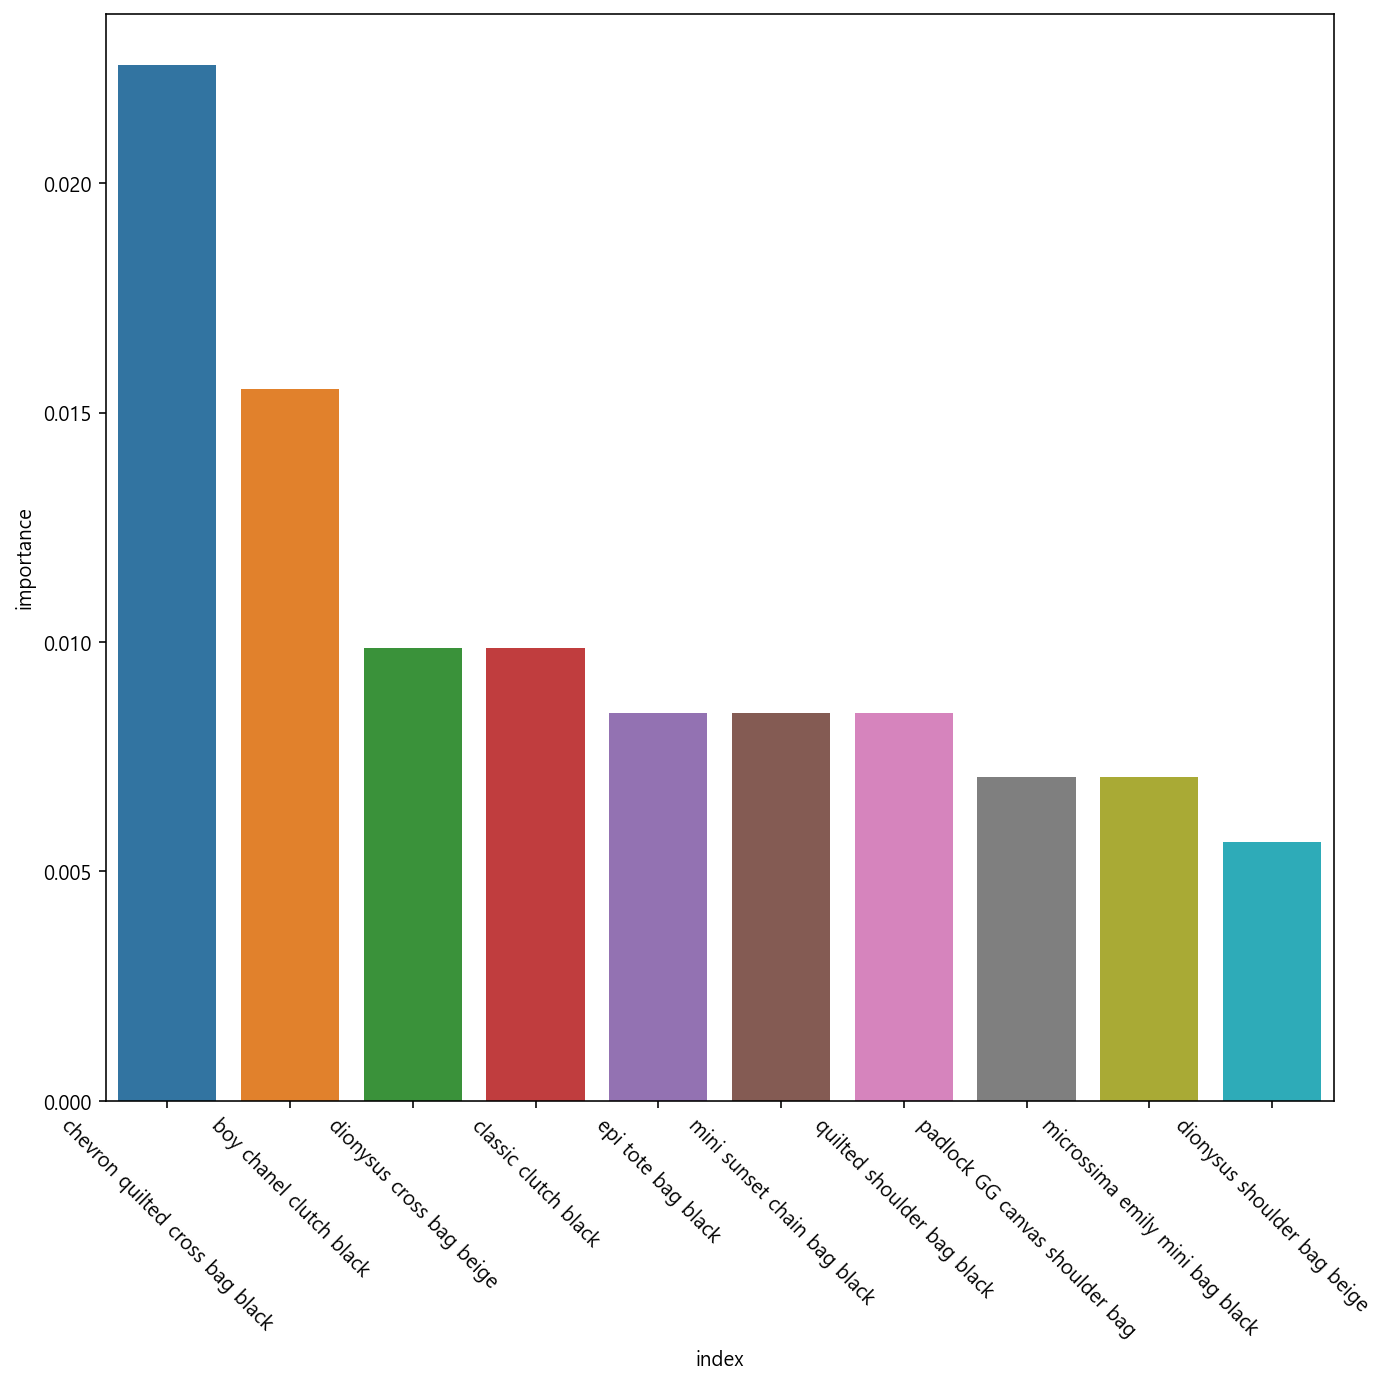

In [74]:
#ts goodsnm 분포 탐색 심화
df_ts2=pd.DataFrame(df_ts['goodsnm'].value_counts())
df_ts2.reset_index(inplace=True)
df_ts2['importance']=df_ts2['goodsnm']/df_ts2['goodsnm'].sum()
df_ts2=df_ts2.sort_values(by='importance',ascending=False).drop('goodsnm',axis=1)
df_ts2=df_ts2.head(10)
fig, ax = pyplot.subplots(figsize=(11,10))
plt.xticks(rotation = - 45 )
sns.barplot(data=df_ts2,x='index',y= "importance")

<AxesSubplot:xlabel='index', ylabel='importance'>

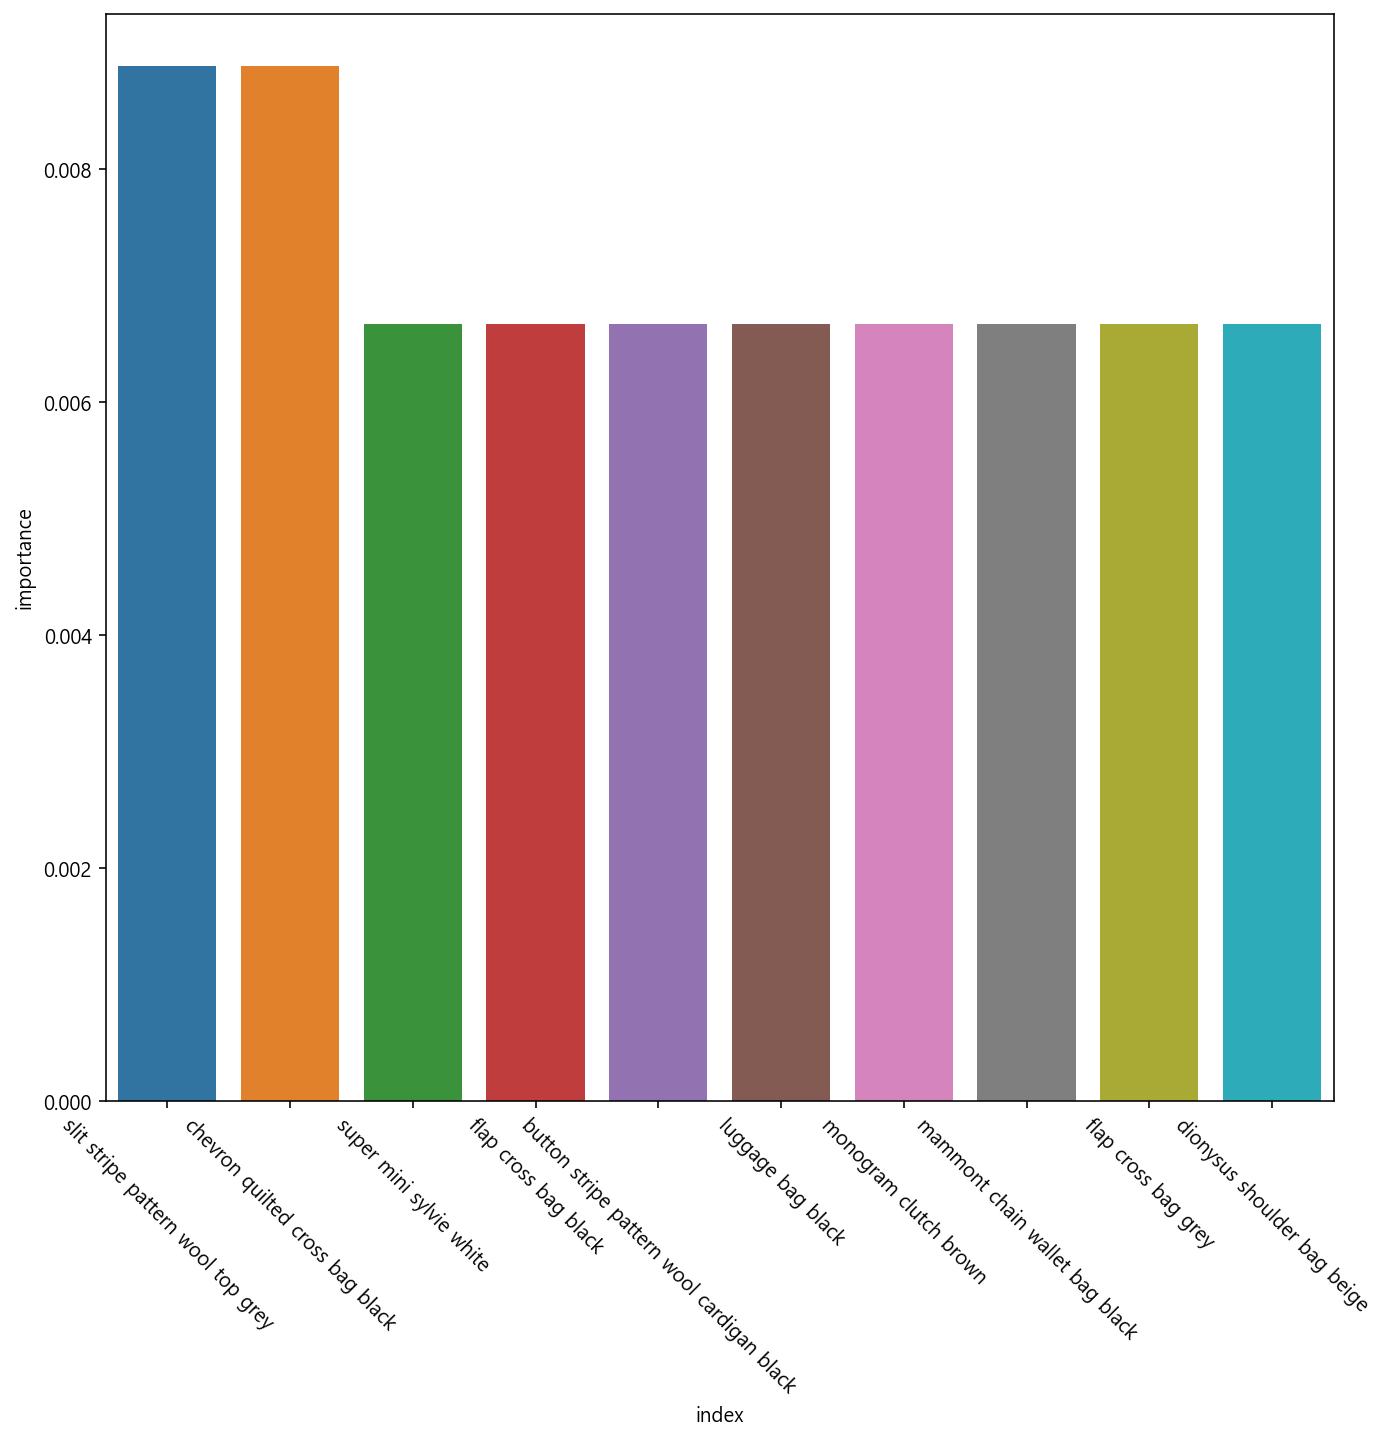

In [78]:
#ta goodsnm 분포 탐색 심화
df_ta2=pd.DataFrame(df_ta['goodsnm'].value_counts())
df_ta2.reset_index(inplace=True)
df_ta2['importance']=df_ta2['goodsnm']/df_ta2['goodsnm'].sum()
df_ta2=df_ta2.sort_values(by='importance',ascending=False).drop('goodsnm',axis=1)
df_ta2=df_ta2.head(10)
fig, ax = pyplot.subplots(figsize=(11,10))
plt.xticks(rotation = - 45 )
sns.barplot(data=df_ta2,x='index',y= "importance")

<AxesSubplot:xlabel='index', ylabel='importbnce'>

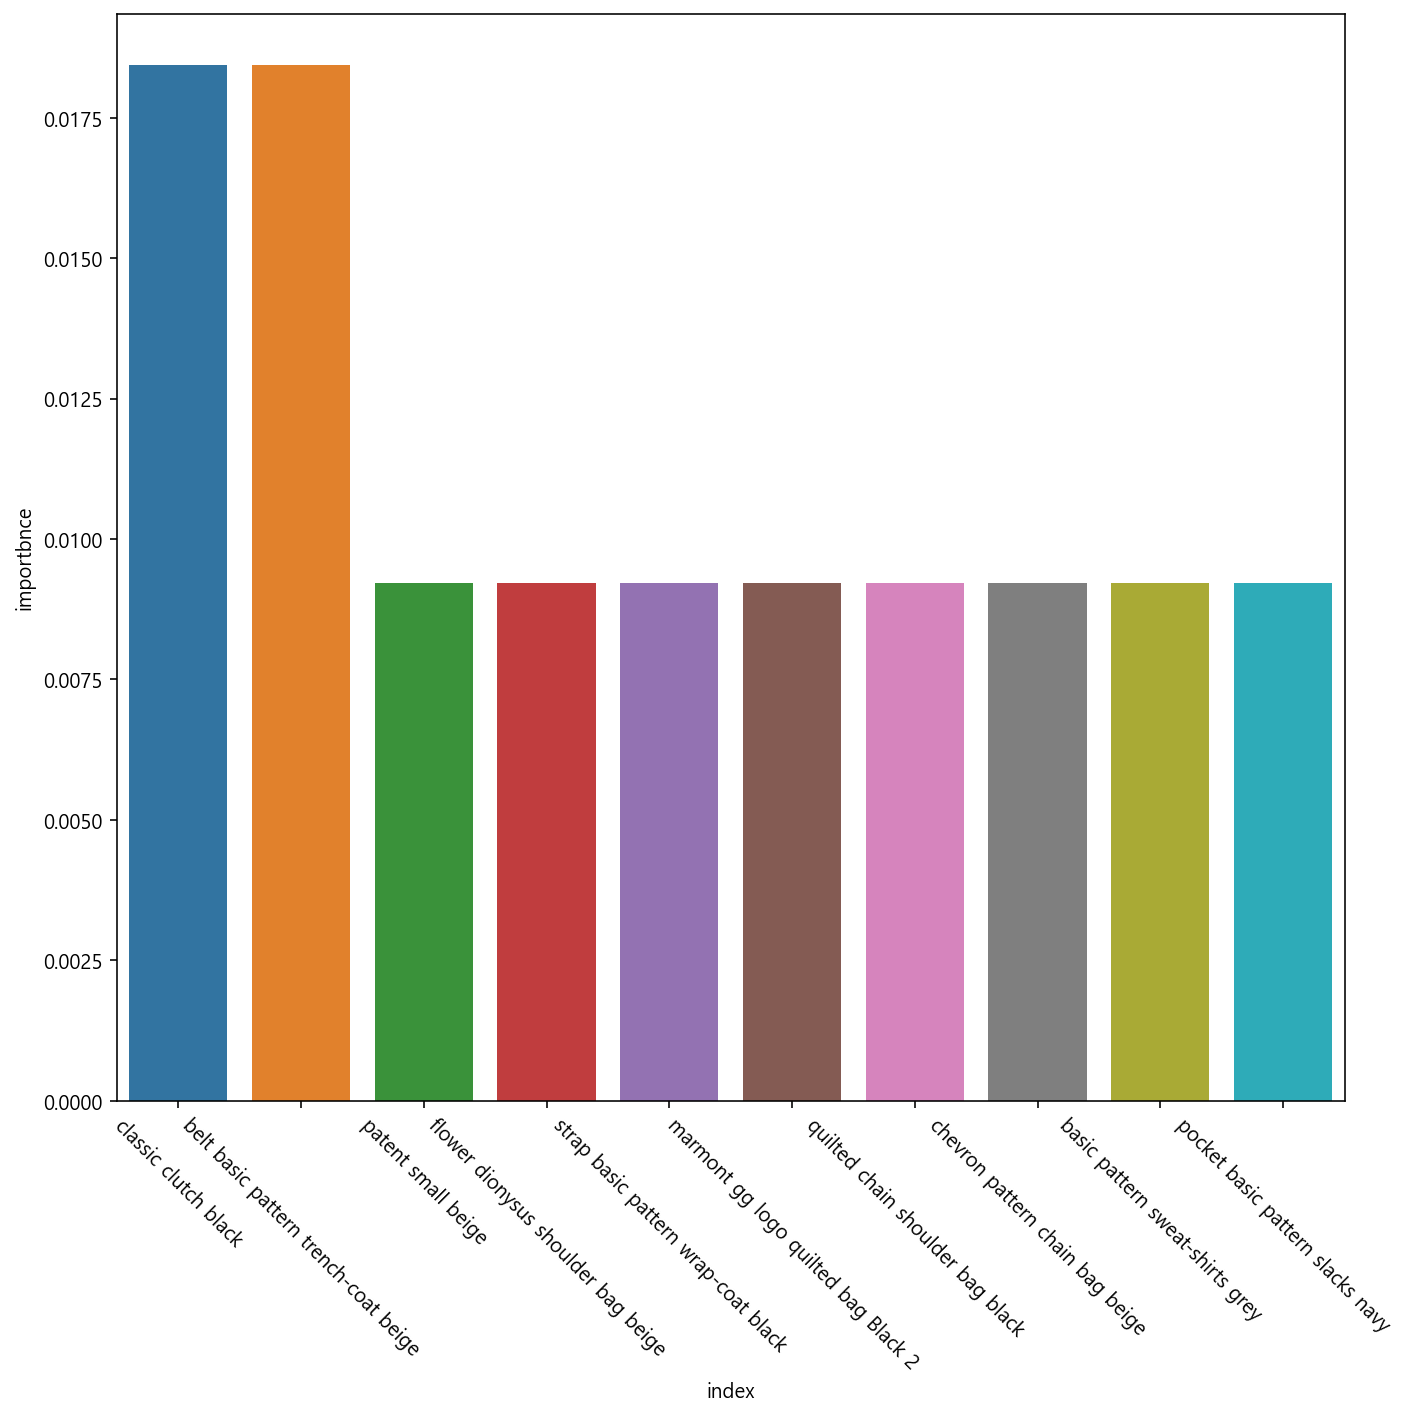

In [82]:
#tb goodsnm 분포 탐색 심화
df_tb2=pd.DataFrame(df_tb['goodsnm'].value_counts())
df_tb2.reset_index(inplace=True)
df_tb2['importbnce']=df_tb2['goodsnm']/df_tb2['goodsnm'].sum()
df_tb2=df_tb2.sort_values(by='importbnce',ascending=False).drop('goodsnm',axis=1)
df_tb2=df_tb2.head(10)
fig, ax = pyplot.subplots(figsize=(11,10))
plt.xticks(rotation = - 45 )
sns.barplot(data=df_tb2,x='index',y= "importbnce")

<AxesSubplot:xlabel='index', ylabel='importcnce'>

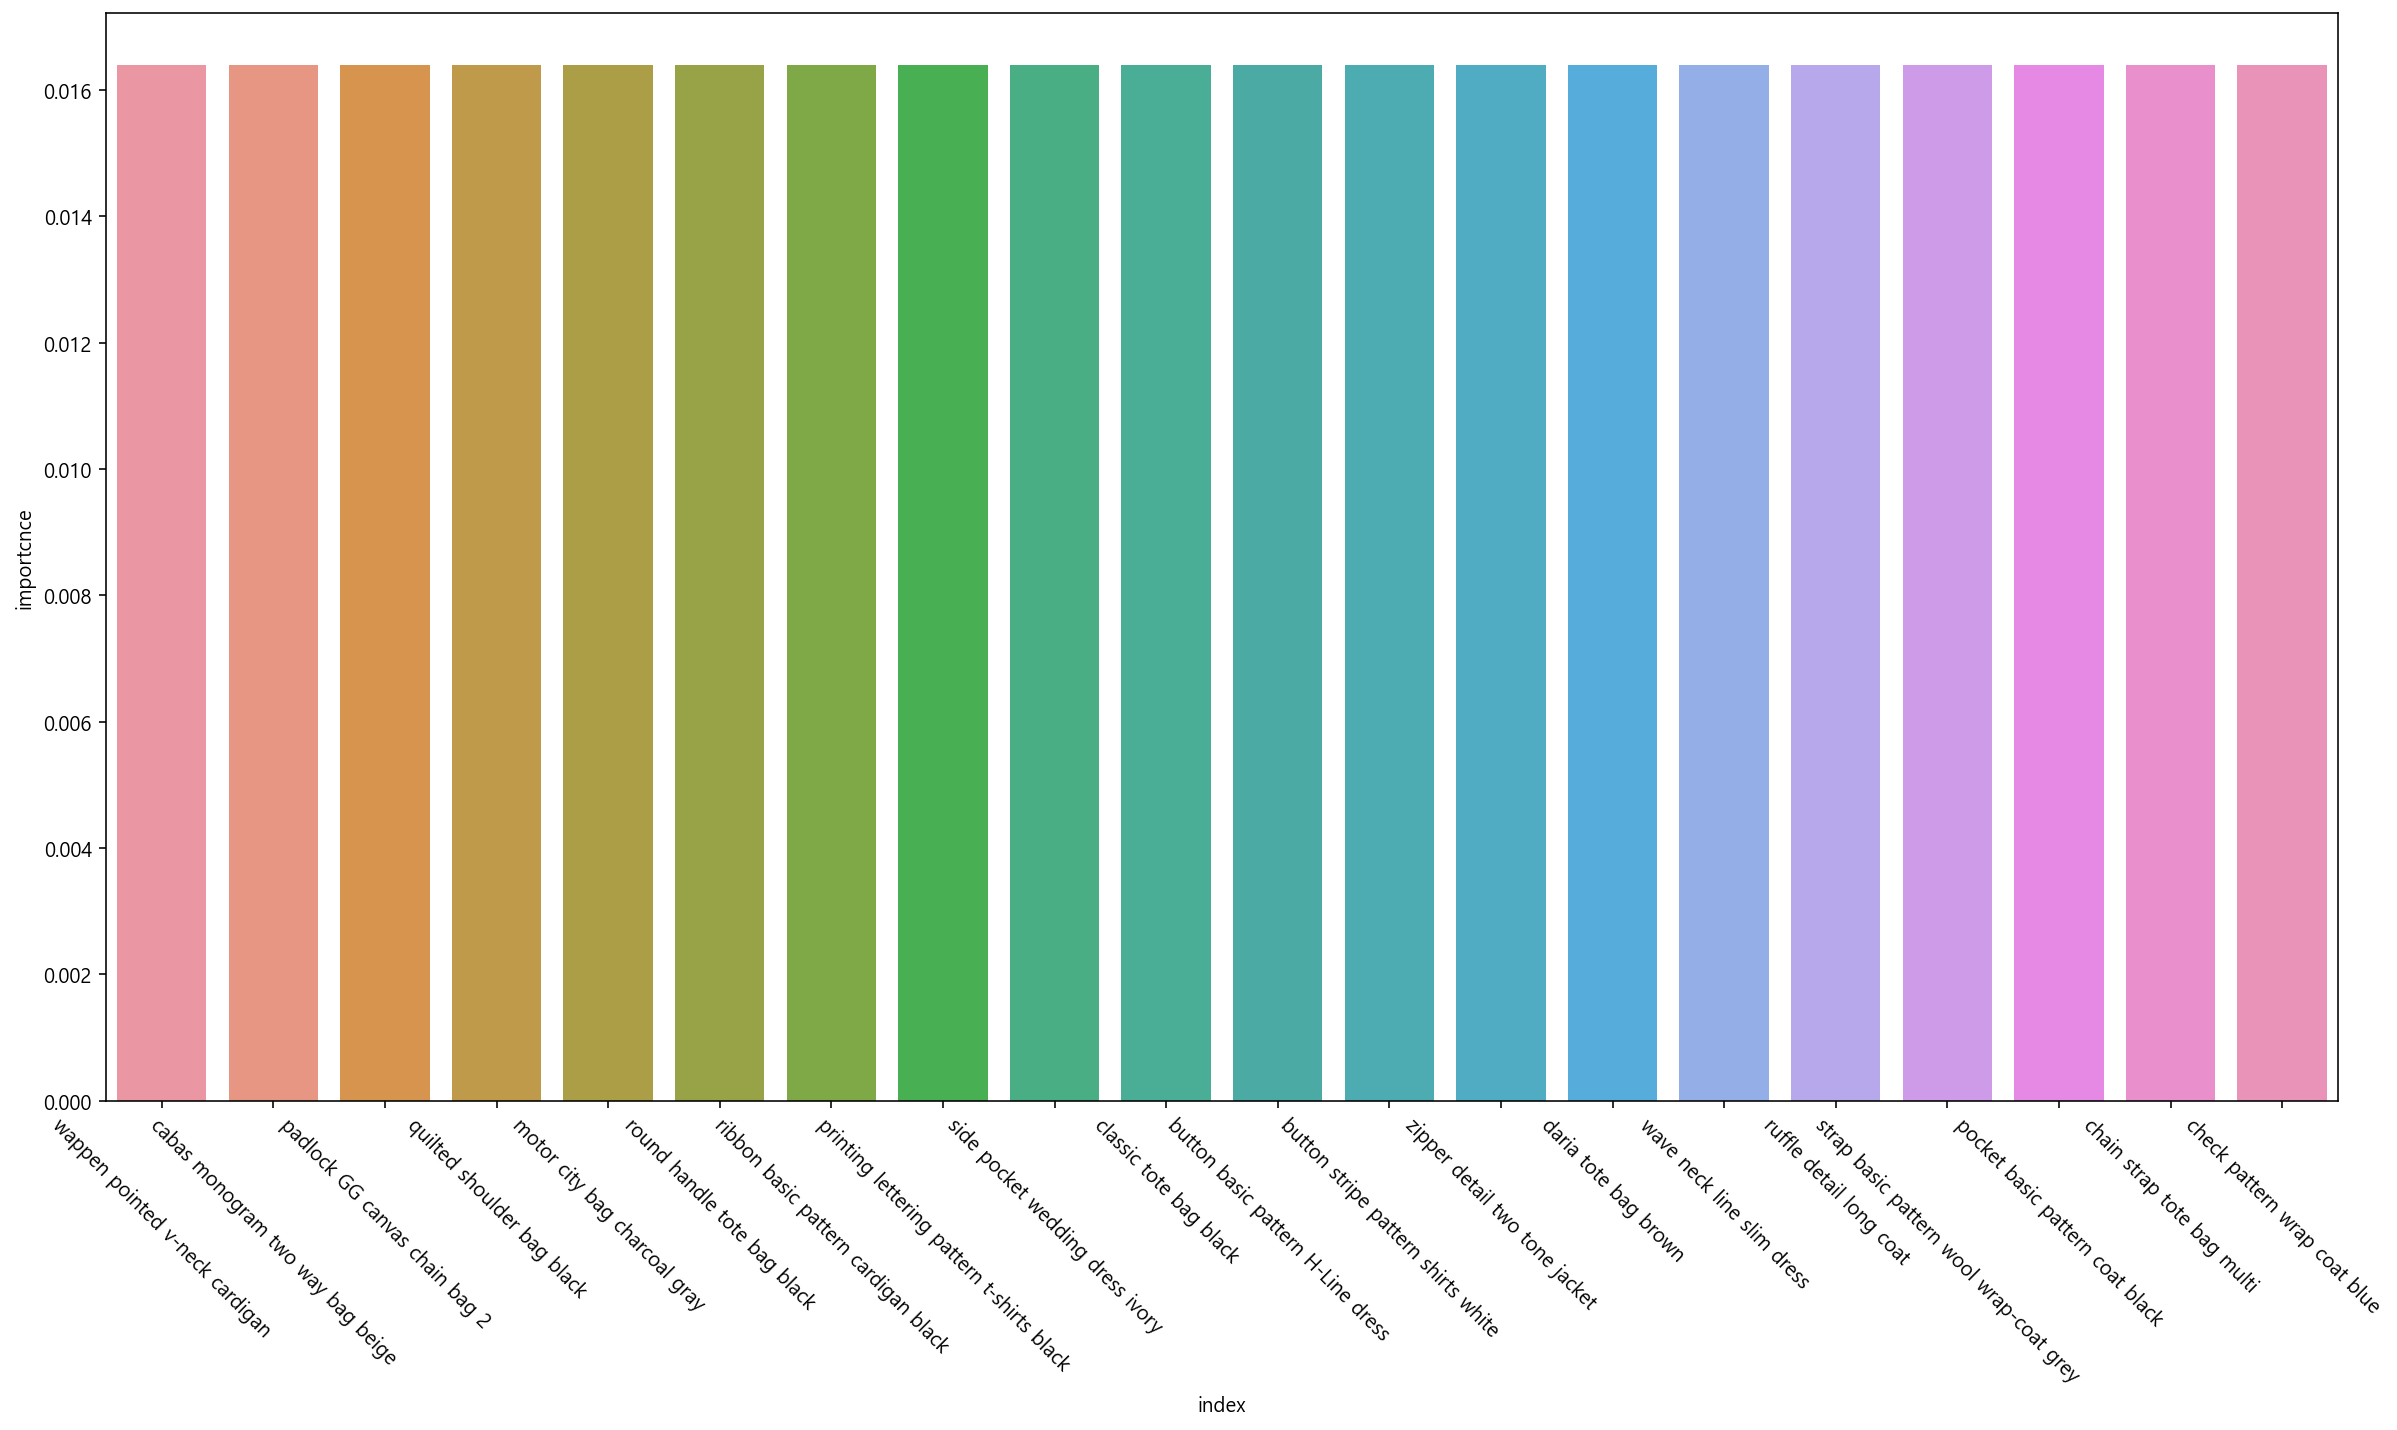

In [88]:
#tc goodsnm 분포 탐색 심화
df_tc2=pd.DataFrame(df_tc['goodsnm'].value_counts())
df_tc2.reset_index(inplace=True)
df_tc2['importcnce']=df_tc2['goodsnm']/df_tc2['goodsnm'].sum()
df_tc2=df_tc2.sort_values(by='importcnce',ascending=False).drop('goodsnm',axis=1)
df_tc2=df_tc2.head(20)
fig, ax = pyplot.subplots(figsize=(20,10))
plt.xticks(rotation = - 45 )
sns.barplot(data=df_tc2,x='index',y= "importcnce")

In [92]:
df_tc3=pd.DataFrame(df_tc['goodsnm'].value_counts())
df_tc3.reset_index(inplace=True)
df_tc3

,index,goodsnm
0,wappen pointed v-neck cardigan,1
1,rockstud cross bag orange,1
2,raglan coat black,1
3,button basic pattern A-Line dress cream,1
4,monogram cross body bag brown,1
...,...,...
56,belt basic pattern padding-outer black,1
57,button basic pattern wool doublebreasted-jacke...,1
58,monogram shoulder bag black,1
59,half round chain bag black,1
